# PREDSTAVITEV GIBANJA CEN KRIPTOVALUT IN NJIHOVA ANALIZA

Avtor: Žan Luka Kolarič

## UVOD
V tej nalogi bom pridobil zgodovinske podatke treh največjih kriptovalut za obdobje 5 let, lahko bi izbral tudi drugačno obdobje, jih uredil, analiziral in seveda shranil. Najprej bom dodal nekaj stolpcev z novimi podatki k že obstoječim podatkom, nato pa s pomočjo grafov analiziral gibanje cen, njihov volumen in njihove rasti.

## PRIDOBITEV IN UREJANJE PODATKOV

Najprej uvozim potrebne knjižnice, ki so potrebne za prenos podatkov in njihovo urejanje.


In [36]:
import yfinance as yf
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

Za nadaljevanje si moramo na spletni strani [Yahoo](https://finance.yahoo.com/) izbrati kriptovalute, katerih podatki nas zanimajo. Sam si bom izbral naslednje tri v primerjavi z ameriškim dolarjem:

In [37]:
imena_kriptovalut = ['BTC-USD', 'BNB-USD', 'ETH-USD']

Sedaj si lahko izberemo časovni interval, ki ga bomo opazovali, tj. začetek (z) in konec (k). Če teh dveh parametrov ne izberemo, se nastavita na vrednosti z = "2015-09-17" in k = "2023-08-01". Sam bom izbral naslednji vrednosti:

In [38]:
z = "2018-07-17"
k = "2023-07-18"

Za uvoz podatkov bomo uporabili funkcijo, ki jo uvozimo iz datoteke funkcije.py. S pomočjo te funkcije smo sestavili slovar, v katerem imamo tri tabele, po eno za vsako kriptovaluto. Za predstavo si lahko pogledamo tabelo za Bitcoin:

In [39]:
from funkcije import pridobi_podatke
podatki_o_kriptovalutah = pridobi_podatke(imena_kriptovalut, z, k)
podatki_o_kriptovalutah["BTC-USD"]

[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-07-17,6739.649902,7387.240234,6684.169922,7321.040039,7321.040039,5961950208
2018-07-18,7315.319824,7534.990234,7280.470215,7370.779785,7370.779785,6103410176
2018-07-19,7378.200195,7494.459961,7295.459961,7466.859863,7466.859863,5111629824
2018-07-20,7467.399902,7594.669922,7323.259766,7354.129883,7354.129883,4936869888
2018-07-21,7352.720215,7437.640137,7262.410156,7419.290039,7419.290039,3726609920
...,...,...,...,...,...,...
2023-07-13,30387.488281,31814.515625,30268.351562,31476.048828,31476.048828,23686079548
2023-07-14,31474.720703,31582.253906,29966.386719,30334.068359,30334.068359,20917902660
2023-07-15,30331.783203,30407.781250,30263.462891,30295.806641,30295.806641,8011667756


## UREJANJE TABEL

Da bodo tabele lepo urejene, najprej zapolnimo prazne prostore v tabelah. To storimo s pomočjo funkcije 'ffill'. Ta funkcija prazne prostore zapolni s podatki iz prejšnjega znanega dne. Za lažjo preglednost bomo vse podatke zaokrožili na 4 decimalna mesta. Vse to storimo z naslednjo funkcijo:

In [40]:
from funkcije import uredi_podatke
podatki_o_kriptovalutah = uredi_podatke(podatki_o_kriptovalutah)
podatki_o_kriptovalutah["BTC-USD"]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-07-17,6739.6499,7387.2402,6684.1699,7321.0400,7321.0400,5961950208
2018-07-18,7315.3198,7534.9902,7280.4702,7370.7798,7370.7798,6103410176
2018-07-19,7378.2002,7494.4600,7295.4600,7466.8599,7466.8599,5111629824
2018-07-20,7467.3999,7594.6699,7323.2598,7354.1299,7354.1299,4936869888
2018-07-21,7352.7202,7437.6401,7262.4102,7419.2900,7419.2900,3726609920
...,...,...,...,...,...,...
2023-07-13,30387.4883,31814.5156,30268.3516,31476.0488,31476.0488,23686079548
2023-07-14,31474.7207,31582.2539,29966.3867,30334.0684,30334.0684,20917902660
2023-07-15,30331.7832,30407.7812,30263.4629,30295.8066,30295.8066,8011667756


## DOPOLNITEV TABEL

Do sedaj imamo za vse kriptovalute za vsak dan podano odpiralno vrednost ("Open"), najvišjo vrednost ("High), najnižjo vrednost ("Low"), zapiralno vrednost ("Close"), prilagojeno zaključno vrednost ("Adj close") in volumen ("Volume"). V tem delu bomo našim tabelam dodali nove stolpce, v katerih bomo izračunali dnevno rast kriptovalut, ki nam pove za koliko enot se je tečaj spremenil v enem dnevu, njihovo dnevno povprečje ter njihovo rast v procentih. 

### DNEVNA RAST


In [41]:
from funkcije import dodaj_dnevna_rast
podatki_o_kriptovalutah = dodaj_dnevna_rast(podatki_o_kriptovalutah)
podatki_o_kriptovalutah["BTC-USD"]

,Open,High,Low,Close,Adj Close,Volume,Dnevna rast
Date,,,,,,,
2018-07-17,6739.6499,7387.2402,6684.1699,7321.0400,7321.0400,5961950208,581.3901
2018-07-18,7315.3198,7534.9902,7280.4702,7370.7798,7370.7798,6103410176,55.4600
2018-07-19,7378.2002,7494.4600,7295.4600,7466.8599,7466.8599,5111629824,88.6597
2018-07-20,7467.3999,7594.6699,7323.2598,7354.1299,7354.1299,4936869888,-113.2700
2018-07-21,7352.7202,7437.6401,7262.4102,7419.2900,7419.2900,3726609920,66.5698
...,...,...,...,...,...,...,...
2023-07-13,30387.4883,31814.5156,30268.3516,31476.0488,31476.0488,23686079548,1088.5605
2023-07-14,31474.7207,31582.2539,29966.3867,30334.0684,30334.0684,20917902660,-1140.6523
2023-07-15,30331.7832,30407.7812,30263.4629,30295.8066,30295.8066,8011667756,-35.9766


### POVPREČJE

Povprečno vrednost dneva smo izračunali kot povprečje med začetno in končno vrednostjo. Lahko bi jo izračunali tudi glede na začetno vrednostjo enega in začetno vrednostjo drugega dneva, ali pa celo s končnimi vrednostmi, vendar to pri kriptovalutah ni tako pomembno, saj se lahko trgujejo skozi celoten dan in ne samo določen del dneva, tako kot delnice na borzah.

In [42]:
from funkcije import povprecje
podatki_o_kriptovalutah = povprecje(podatki_o_kriptovalutah)
podatki_o_kriptovalutah["BTC-USD"]

,Open,High,Low,Close,Adj Close,Volume,Dnevna rast,Povprečje
Date,,,,,,,,
2018-07-17,6739.6499,7387.2402,6684.1699,7321.0400,7321.0400,5961950208,581.3901,7030.3450
2018-07-18,7315.3198,7534.9902,7280.4702,7370.7798,7370.7798,6103410176,55.4600,7343.0498
2018-07-19,7378.2002,7494.4600,7295.4600,7466.8599,7466.8599,5111629824,88.6597,7422.5300
2018-07-20,7467.3999,7594.6699,7323.2598,7354.1299,7354.1299,4936869888,-113.2700,7410.7649
2018-07-21,7352.7202,7437.6401,7262.4102,7419.2900,7419.2900,3726609920,66.5698,7386.0051
...,...,...,...,...,...,...,...,...
2023-07-13,30387.4883,31814.5156,30268.3516,31476.0488,31476.0488,23686079548,1088.5605,30931.7686
2023-07-14,31474.7207,31582.2539,29966.3867,30334.0684,30334.0684,20917902660,-1140.6523,30904.3946
2023-07-15,30331.7832,30407.7812,30263.4629,30295.8066,30295.8066,8011667756,-35.9766,30313.7949


### RAST V PROCENTIH

Da bomo lažje primerjali gibanje kriptovalut si bomo izračunali njihovo rast. Izračunali jo bomo kot kvocient med končno in začetno vrednostjo, od katerega odštejemo 1 in pomnožimo s 100. Tako dobimo vrednost v procentih.

In [43]:
from funkcije import rast_v_procentih
podatki_o_kriptovalutah = rast_v_procentih(podatki_o_kriptovalutah)
podatki_o_kriptovalutah["BTC-USD"]

,Open,High,Low,Close,Adj Close,Volume,Dnevna rast,Povprečje,Rast v %
Date,,,,,,,,,
2018-07-17,6739.6499,7387.2402,6684.1699,7321.0400,7321.0400,5961950208,581.3901,7030.3450,8.6264
2018-07-18,7315.3198,7534.9902,7280.4702,7370.7798,7370.7798,6103410176,55.4600,7343.0498,0.7581
2018-07-19,7378.2002,7494.4600,7295.4600,7466.8599,7466.8599,5111629824,88.6597,7422.5300,1.2016
2018-07-20,7467.3999,7594.6699,7323.2598,7354.1299,7354.1299,4936869888,-113.2700,7410.7649,-1.5169
2018-07-21,7352.7202,7437.6401,7262.4102,7419.2900,7419.2900,3726609920,66.5698,7386.0051,0.9054
...,...,...,...,...,...,...,...,...,...
2023-07-13,30387.4883,31814.5156,30268.3516,31476.0488,31476.0488,23686079548,1088.5605,30931.7686,3.5823
2023-07-14,31474.7207,31582.2539,29966.3867,30334.0684,30334.0684,20917902660,-1140.6523,30904.3946,-3.6240
2023-07-15,30331.7832,30407.7812,30263.4629,30295.8066,30295.8066,8011667756,-35.9766,30313.7949,-0.1186


## SHRANJEVANJE

Podatke želimo shraniti v datoteke formata .csv, v ločeno mapo imenovano datoteke in za vsako kriptovaluto posebej za lažjo preglednost. To storimo z naslednjo funkcijo:

In [44]:
from funkcije import shrani
shrani(podatki_o_kriptovalutah)

## RISANJE GRAFOV

V tem razdelku bomo analizirali pridobljene in izračunane podatke s pomočjo grafov.

### GRAF CEN
Sestavili bomo graf s pomočjo funkcije iz knjižnice matplotlib.pyplot. Uporabili bomo odpiralne ter povprečne cene trgovalnega dne za vsako valuto in zapisali ugotovitve. Prvi graf nam prikazuje odpiralne cene, drugi graf pa povprečne cene.

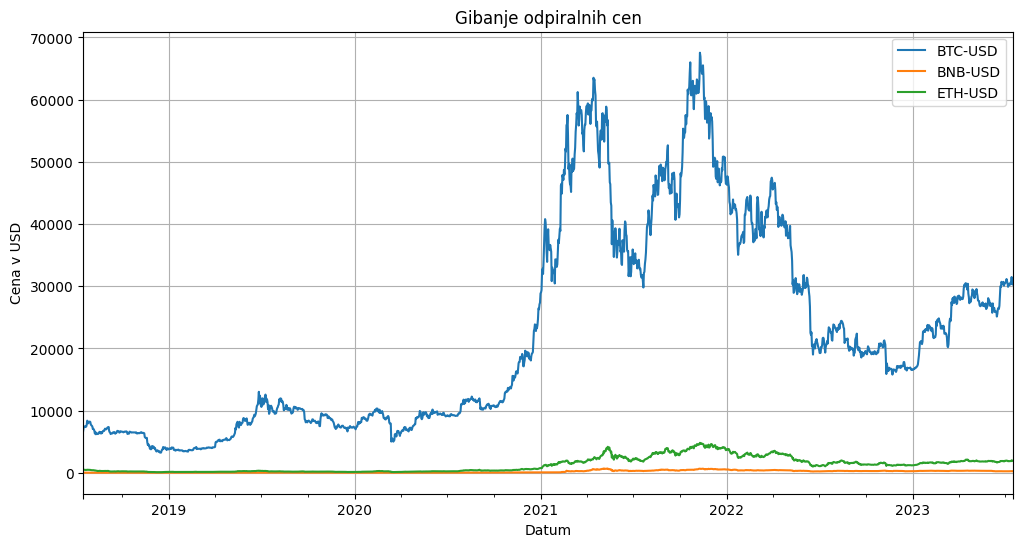

In [45]:
from funkcije import graf_odpiralnih_cen
graf_odpiralnih_cen(podatki_o_kriptovalutah)

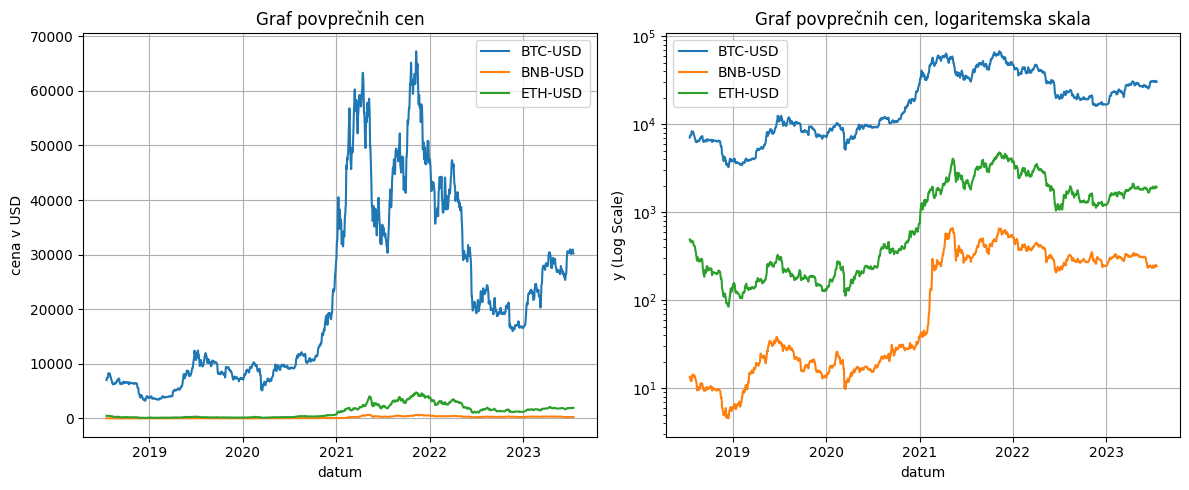

In [46]:
from funkcije import graf_povprecnih_cen
graf_povprecnih_cen(podatki_o_kriptovalutah)

Kot lahko vidimo, so cene Bitcoina veliko višje kot cene od Ethereuma, z Binance coin pa cen skoraj ne moremo primerjati, zato smo pri povprečnih cenah naredili tudi graf v logaritemski skali za lažje primerjanje.

Vidimo lahko, da se cene vseh treh gibljejo približno enako. Vsi so imeli svoj maksimum v letu 2021, nato se je rast ustavila in je cena začela padati. Večjih sprememb v ceni je bil deležen BNB, ETH in BTC sta pa imela približno enako gibanje cen.

### GRAF RASTI V PROCENTIH
Sedaj si bomo pogledali kako se je spreminjala rast teh kriptovalut.

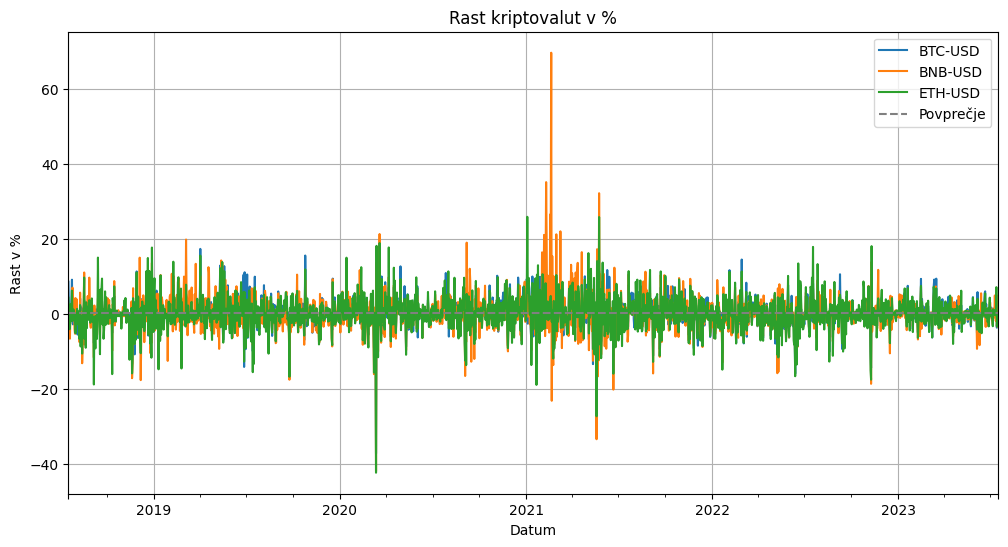

In [47]:
from funkcije import graf_rasti_v_procentih
graf_rasti_v_procentih(podatki_o_kriptovalutah)

Gibanje rasti iz zgornjega grafa ni lahko razvidno, zato si bomo kot opazovalno obdobje izbrali le obdobje zadnjega pol leta. Znova lahko za zacetek in konec vzamemo različne parametre.

In [48]:
zacetek = "2023-01-17"
konec = "2023-07-18"
podatki_o_kriptovalutah = rast_v_procentih(povprecje(dodaj_dnevna_rast(uredi_podatke(pridobi_podatke(imena_kriptovalut, zacetek, konec)))))
graf_rasti_v_procentih(podatki_o_kriptovalutah)


Opazimo lahko, da v obdobju zadnjega pol leta ni bilo bistvenih sprememb v ceni. Vse tri valute imajo zelo veliko nihanje, kar pa seveda ni najbolje. Če bi si morda pogledali obdobje največje rasti, tj. leto 2021 pa je stvar povsem drugačna. Tam lahko vidimo pozitivno rast v večini obdobja. Največjo rast je v začetku leta imel Binance coin, Ethereum in Bitcoin pa sta bila dokaj izenačena. Vidimo lahko, da je BNB v enem dnevu zrastel za več kot 60 %.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


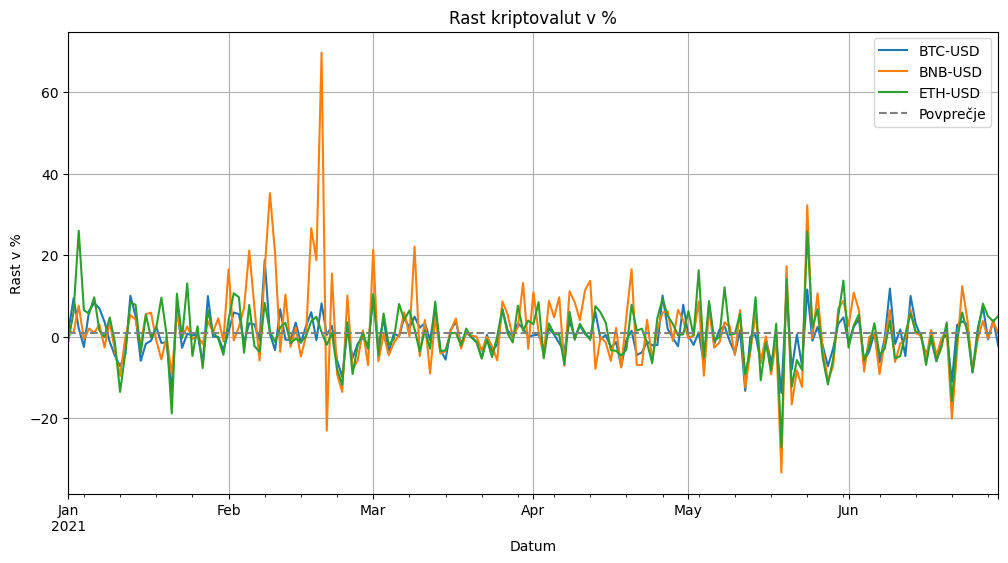

In [ ]:
zacetek = "2021-01-01"
konec = "2021-07-01"
podatki_o_kriptovalutah = rast_v_procentih(povprecje(dodaj_dnevna_rast(uredi_podatke(pridobi_podatke(imena_kriptovalut, zacetek, konec)))))
graf_rasti_v_procentih(podatki_o_kriptovalutah)

### GRAF VOLUMNA

Volumen kriptovalute je količina kriptovalute, ki je bila trgovana v določenem obdobju. Pove, koliko enot te kriptovalute je bilo kupljenih ali prodanih med trgovskim obdobjem. Visok volumen običajno kaže na veliko zanimanje in aktivnost trgovcev za to kriptovaluto, medtem ko nizek volumen lahko kaže na manjši obseg trgovanja. Volumen se zelo močno povezuje tudi z gibanjem cen. Na primer visok volumen v kombinaciji z rastjo cen lahko nakazuje močan trend navzgor, medtem ko visok volumen v kombinaciji s padanjem cen lahko nakazuje močan trend navzdol.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


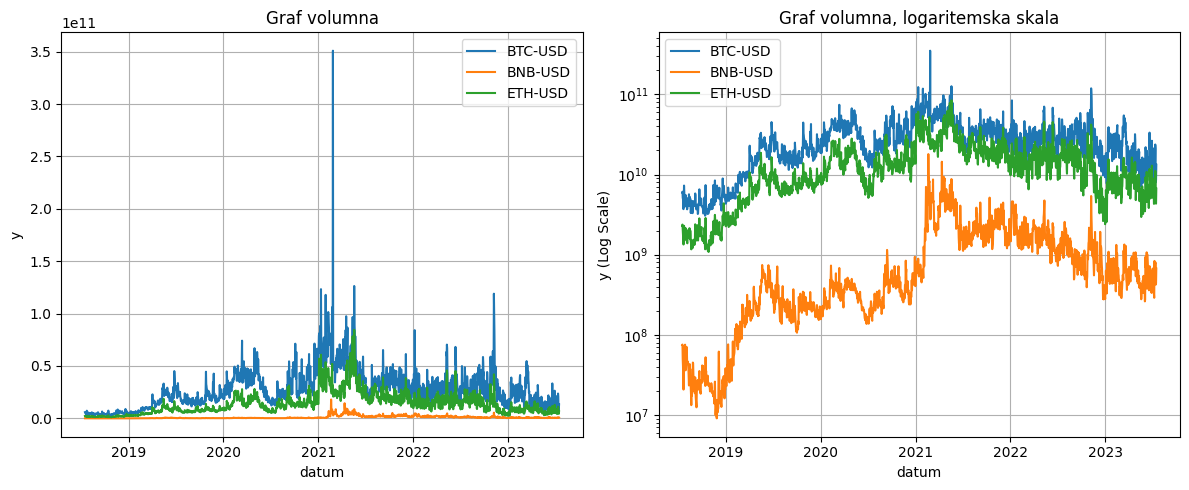

In [ ]:
from funkcije import graf_volumna
podatki_o_kriptovalutah = rast_v_procentih(povprecje(dodaj_dnevna_rast(uredi_podatke(pridobi_podatke(imena_kriptovalut, z, k)))))

graf_volumna(podatki_o_kriptovalutah)

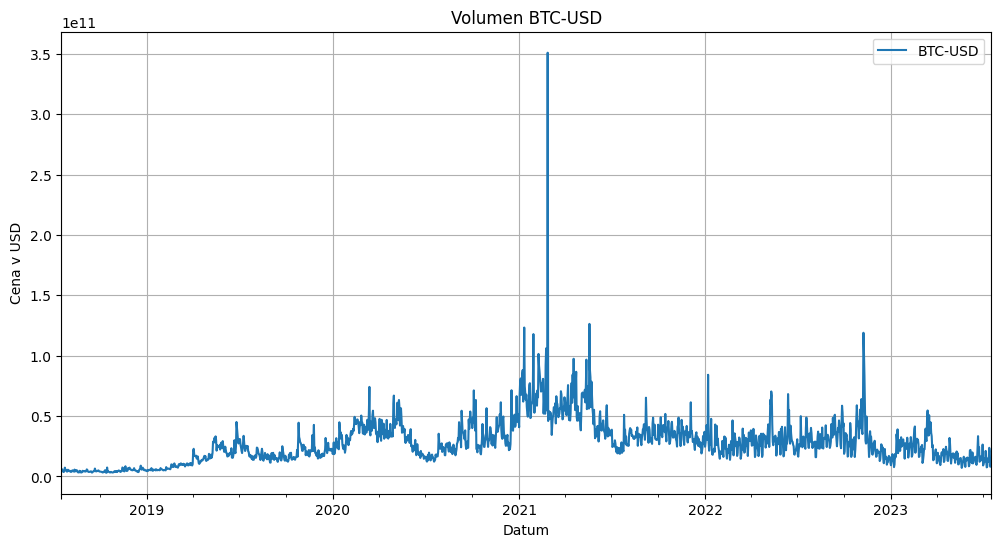

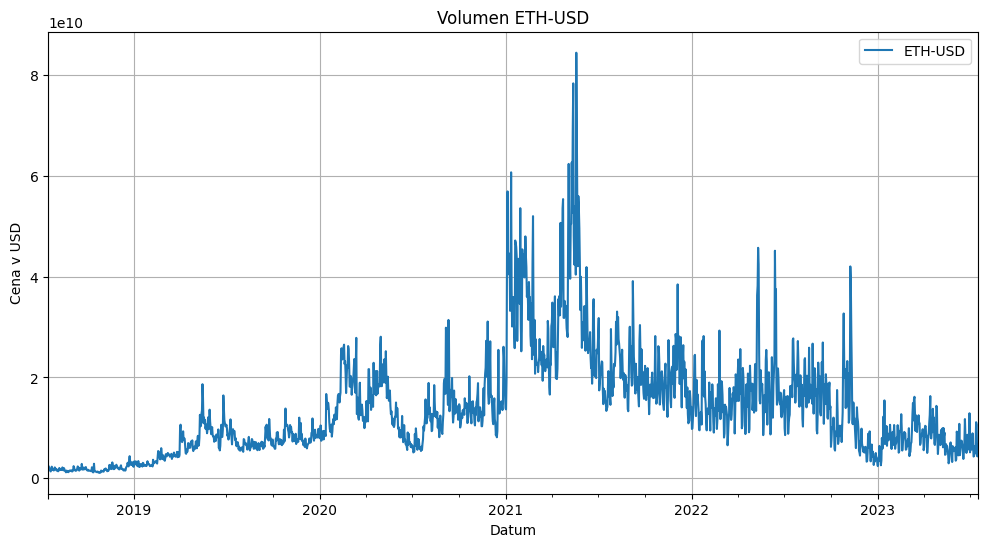

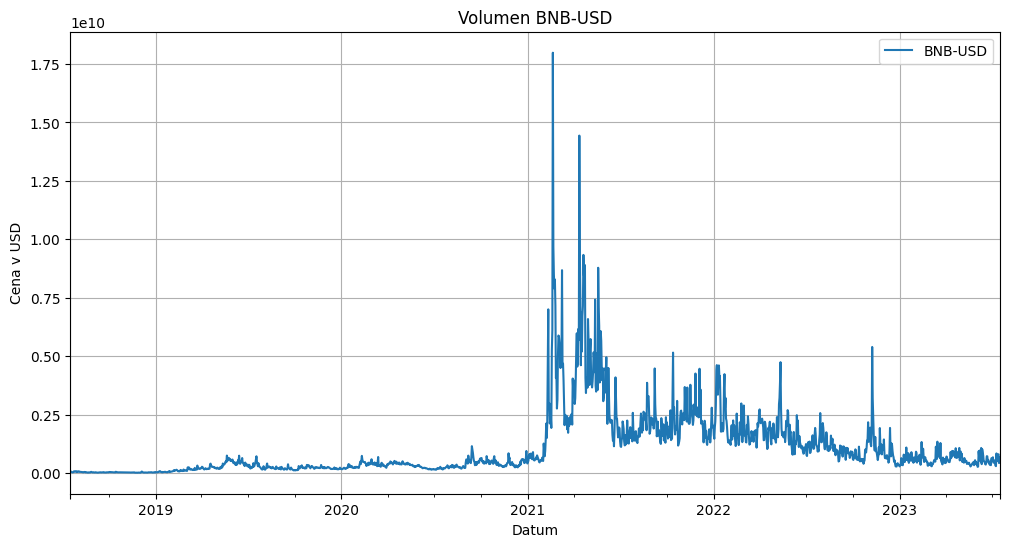

In [ ]:
from funkcije import graf_volumna_BTC
from funkcije import graf_volumna_ETH
from funkcije import graf_volumna_BNB

graf_volumna_BTC(podatki_o_kriptovalutah)
graf_volumna_ETH(podatki_o_kriptovalutah)
graf_volumna_BNB(podatki_o_kriptovalutah)

Iz zgornjih grafof volumna lahko opazimo, da se je z vsemi tremi tečaji največ trgovalo ravno v letu 2021, kar je povsem razumljivo, saj je so takrat imele vse valute najvišjo vrednost. Opazimo lahko tudi, da se je nato volumen znova znižal na približno enako raven kot je bilo pred hitro rastjo cen.